# unpad

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from porespy.tools import get_border, extend_slice, extract_subsection


def unpad(im, pad_width):
    r"""
    removes padding from an image then extracts the result corresponding to the original image shape.
    Parameters
    ----------
    im : ND-image
        The image to which ``func`` should be applied
    pad_width : int or list of ints
        The amount of padding on each axis.  Refer to ``numpy.pad``
        documentation for more details.
    Notes
    -----
    A use case for this is when using ``skimage.morphology.skeletonize_3d``
    to ensure that the skeleton extends beyond the edges of the image.
    """
    padded = np.pad(im, pad_width=pad_width,
                    mode='constant', constant_values=1)
    
    if type(pad_width) == int:
        new_pad_width = []
        for r in range (0,len(im.shape)):
            new_pad_width.append(pad_width)
        pad_width = new_pad_width
    
    if type(pad_width) == list:
        pad_width = np.asarray(pad_width)
        shape = im.shape - pad_width[0] - pad_width[1]
       
        
    difference = (pad_width[0]-pad_width[1])
    if shape[0] < 1:
        shape = np.array(im.shape) * shape
    center = np.array(im.shape)
    center[0] = shape[0]/2 -difference
    center[1] = shape[1]/2 -difference
    s_im = []
    for dim in range(im.ndim):
        r = shape[dim] / 2
        lower_im = pad_width[0]
        upper_im = shape[dim] + pad_width[0]        
        s_im.append(slice(int(lower_im), int(upper_im)))

        
    return im[tuple(s_im)]

## Import packages

In [3]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from porespy.tools import get_border, extend_slice, extract_subsection
ps.visualization.set_mpl_style()

## Create variable

In [4]:
im = ps.generators.blobs([100,150], porosity = 0.3)
pad_width = [10,50]

## Apply tool

shape original: (100, 150)
shape padded: (160, 210)
shape new unpad: (100, 150)


Text(0.5, 1.0, 'pad removed')

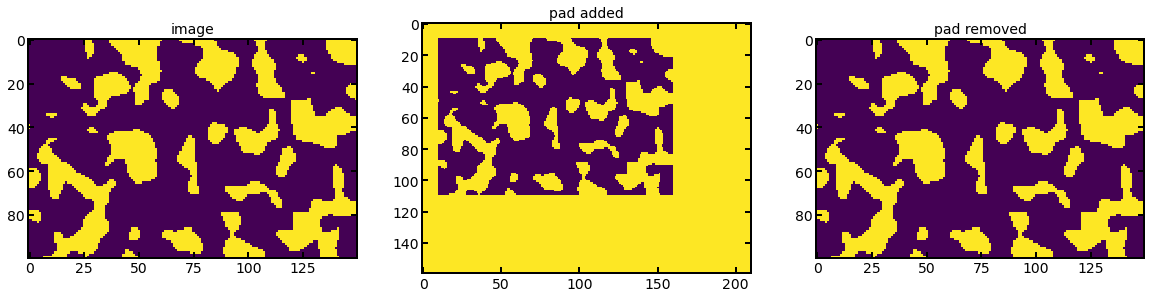

In [5]:
print("shape original:", im.shape)
im1 = np.pad(im, pad_width, mode = "constant", constant_values = 1)
print("shape padded:", im1.shape)
im3 = unpad(im1, pad_width)
print("shape new unpad:", im3.shape)


fig, ax = plt.subplots(1, 3, figsize=[20,20]);
ax[0].imshow(im);
ax[1].imshow(im1);
ax[2].imshow(im3);
ax[0].set_title('image')
ax[1].set_title('pad added')
ax[2].set_title('pad removed');